# Importação das bibliotecas

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

# Carregamento dos dataset de resultados

In [22]:
#usuario= "igorcapeletti"
usuario= "igorubuntu"

raiz= f"/home/{usuario}/github/tcc_eBPF_XDP/graficos"

#pasta de resultados gerais para programas eBPF: ----------------
#pasta_resultado_ebpf= 'resultados1'
#pasta_resultado_ebpf= 'resultados2'
pasta_resultado_ebpf= 'resultados3'
#pasta_resultado_ebpf= 'resultados4'
raiz_ebpf= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{pasta_resultado_ebpf}"


#pasta de resultados gerais para programas AF_XDP: ----------------
#pasta_resultado_af_xdp= 'resultados_af_xdp1'
#pasta_resultado_af_xdp= 'resultados_af_xdp2'
pasta_resultado_af_xdp= 'resultados_af_xdp3'
raiz_af_xdp= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{pasta_resultado_af_xdp}"


#carregamento dos arquivos CSV dos resultados dos programas eBPF: ----------------
df_perf_ebpf = pd.read_csv(f'{raiz_ebpf}/resultado_geral_perf.csv', sep=',', engine='python')
df_perf_ebpf.loc[:,'tipo_programa']= 'ebpf'

#carregamento dos arquivos CSV dos resultados dos programas AF_XDP: ----------------
df_perf_af_xdp = pd.read_csv(f'{raiz_af_xdp}/resultado_geral_perf.csv', sep=',', engine='python')
df_perf_af_xdp.loc[:,'tipo_programa']= 'af_xdp'

#normalizacao dos dados af_xdp
df_perf_af_xdp['hook_ebpf']= df_perf_af_xdp['hook_ebpf'].replace('xdpgeneric','af_xdp')

#concatenação dos dataframes referentes a cada analise (ebpf+af_xdp)
df_perf= pd.concat([df_perf_ebpf,df_perf_af_xdp], sort = False)

In [23]:
lista_combined= [1,2,4,8]

lista_for= ['for_0_a_0','for_0_a_1','for_0_a_100','for_0_a_200','for_0_a_400','for_0_a_800','for_0_a_1600','for_0_a_3200','for_0_a_6400','for_0_a_12800']
lista_alias_for= ['0','1','100','200','400','800','1600','3200','6400','12800']

lista_hook_xdp= ['xdpgeneric','xdpdvr','af_xdp']

lista_pacotes= [64,128,256,512,1024,1500]
lista_alias_pacotes= ['64B','128B','256B','512B','1024B','1500B']

lista_tipo_programa= ['ebpf','af_xdp']

# Normalização dos datasets

In [26]:
#antes de executar isso, eliminar ultima coluna dos arquivos perf que estão em branco

#normalizacao para alterar o nome do algoritmo for_0_a_0 para base-line
#df_perf['algoritmo']= df_perf['algoritmo'].replace('for_0_a_0','base-line')

colunas= ['combined', 'algoritmo', 'hook_ebpf', 'context_switches', 'instructions', 
       'branches', 'branch_misses', 'L1_dcache_loads', 'L1_dcache_load_misses', 
       'LLC_loads','tipo_programa']

df_perf= df_perf[colunas]
for i in colunas:
  df_perf[f'{i}']= df_perf[f'{i}'].astype(str)

for i,j in zip(lista_for,lista_alias_for):
       df_perf['algoritmo']= df_perf['algoritmo'].replace(f'{i}',f'{j}')

df_perf['algoritmo']= df_perf['algoritmo'].astype(int)


df_perf= df_perf.replace('<notcounted>','0')
df_perf= df_perf.replace('.','')

colunas= ['context_switches', 'instructions', 'branches', 'branch_misses',
       'L1_dcache_loads', 'L1_dcache_load_misses', 'LLC_loads']

for i in colunas:
  df_perf[f'{i}']= df_perf[f'{i}'].astype(int)

In [27]:
format_imagens= '.pdf'

# Resultados para ***Instruções***

In [28]:
df_perf

,combined,algoritmo,hook_ebpf,context_switches,instructions,branches,branch_misses,L1_dcache_loads,L1_dcache_load_misses,LLC_loads,tipo_programa
0,1,6400,xdpgeneric,24,968321,1023056,208518,7864,272926,18493,ebpf
1,1,100,xdpdrv,21,943260,1015087,205918,7356,270668,19859,ebpf
2,2,800,xdpdrv,24,984914,1021478,207957,7803,272820,16928,ebpf
3,1,100,xdpgeneric,21,952670,1002325,204090,7729,267435,0,ebpf
4,2,12800,xdpgeneric,25,971085,1009293,205191,7882,269244,17195,ebpf
...,...,...,...,...,...,...,...,...,...,...,...
235,1,1600,af_xdp,28,1014882,1017380,207408,8042,271459,15236,af_xdp
236,1,800,af_xdp,29,1023322,1018318,207383,7814,271550,15254,af_xdp
237,1,400,af_xdp,27,1009077,1018070,207592,8133,271429,15145,af_xdp
238,8,400,af_xdp,73,1806188,1023249,207702,8210,272954,0,af_xdp


# Outros

i1) Qual número de instruções das filas TX/RX para os diferentes tamanhos de pacotes? (todos os modos xdp e base-line)

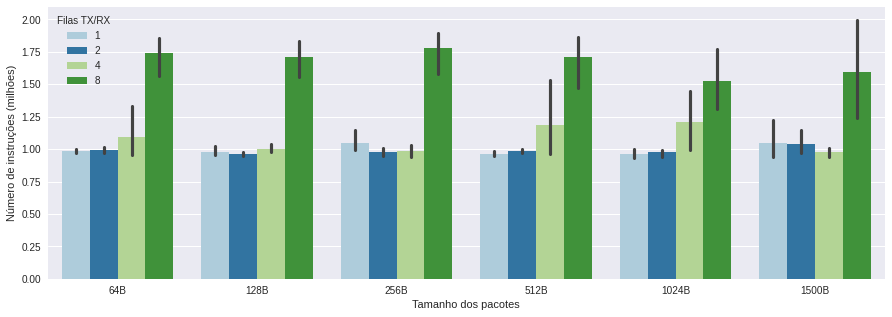

In [88]:
algoritmo= 400
hook_ebpf= 'xdpgeneric'
hook_ebpf= 'xdpdrv'
#hook_ebpf= 'af_xdp'

eixo_x= 'packet_size'
eixo_y= 'instructions'
hue= 'combined'

plt.rc('figure', figsize=(15, 5))
df_perf= df_perf.sort_values(by=[eixo_x, hue], ascending=True)              #ordena dados por tamanho dos pacotes

df= df_perf.copy()

df['packet_size']= df['packet_size'].astype(str)
for i,j in zip(lista_pacotes,lista_alias_pacotes):
       df['packet_size']= df['packet_size'].replace(f'{i}',f'{j}')
       
df= df[df.algoritmo == algoritmo]              #selecionar linhas do algoritmo especifico
#df= df[df.hook_ebpf == hook_ebpf]              #selecionar linhas do modo XDP especifico
df= df[[eixo_x, eixo_y, hue]]
df['instructions']= df['instructions']/1000000   #div por 1 milhão

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired');                      #grafico de barras
#ax = sns.lineplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired', marker='o');        #grafico de linhas
ax.set_ylabel('Número de instruções (milhões)')
ax.set_xlabel("Tamanho dos pacotes")
ax.legend(title = 'Filas TX/RX')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/num_intrucoes_dos_dif_combined_para_todosP_packets@algoritmo_{algoritmo}_todos_xdp{format_imagens}')


i2) Qual uso de CPU das filas TX/RX para os diferentes laços de repetição? (todos os modos xdp e packets 1024)

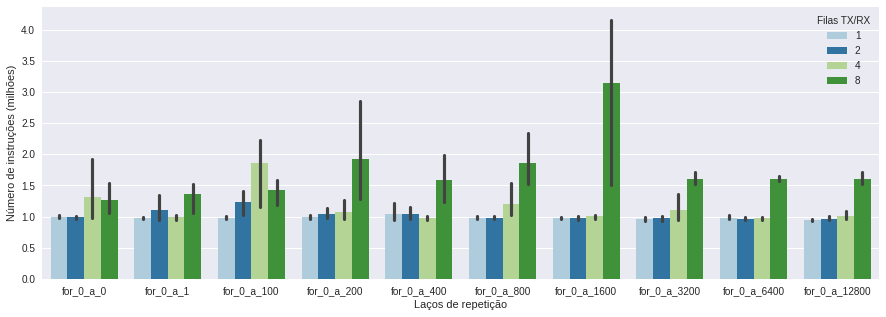

In [89]:
packet_size= 1500
hook_ebpf= 'xdpgeneric'
hook_ebpf= 'xdpdrv'
#hook_ebpf= 'af_xdp'

eixo_x= 'algoritmo'
eixo_y= 'instructions'
hue= 'combined'

plt.rc('figure', figsize=(15, 5))
df_perf= df_perf.sort_values(by=[eixo_x, hue], ascending=True)              #ordena dados por tamanho dos pacotes

df= df_perf.copy()       
df= df[df.packet_size == packet_size]              #selecionar linhas do algoritmo especifico
#df= df[df.hook_ebpf == hook_ebpf]              #selecionar linhas do modo XDP especifico

df['algoritmo']= df['algoritmo'].astype(str)
for i,j in zip(lista_alias_for,lista_for):
       df['algoritmo']= df['algoritmo'].replace(f'{i}',f'{j}')

df= df[[eixo_x, eixo_y, hue]]
df['instructions']= df['instructions']/1000000   #div por 1 milhão

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired');                      #grafico de barras
#ax = sns.lineplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired', marker='o');        #grafico de linhas
ax.set_ylabel('Número de instruções (milhões)')
ax.set_xlabel("Laços de repetição")
ax.legend(title = 'Filas TX/RX')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/num_intrucoes_dos_dif_combined_para_todos_for@packet_size_{packet_size}_todos_xdp{format_imagens}')
